In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('../input/analyticsclubproject/train.csv')
testset = pd.read_csv('../input/analyticsclubproject/test.csv')


y = dataset['Interest_Rate'].copy()
X = dataset.copy()
X.drop(['Loan_ID','Interest_Rate'], axis = 'columns', inplace = True)
X.shape

(131447, 11)

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0001, random_state = 0)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.01749
Feature: 1, Score: 0.27775
Feature: 2, Score: 0.03413
Feature: 3, Score: 0.11767
Feature: 4, Score: 0.06478
Feature: 5, Score: 0.10292
Feature: 6, Score: 0.02987
Feature: 7, Score: 0.06686
Feature: 8, Score: 0.10905
Feature: 9, Score: 0.14064
Feature: 10, Score: 0.03883


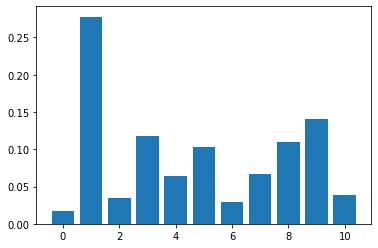

In [170]:
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X_train, y_train = make_classification(n_samples=1000, n_features=11, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [21]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [203]:
from lightgbm import LGBMClassifier

classifier = LGBMClassifier(n_estimators = 600,learning_rate = 0.05,max_bin = 350)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.2857142857142857


In [205]:
final_pred = classifier.predict(testset.drop(['Loan_ID'], axis = 'columns'))

In [206]:
submission = pd.DataFrame({'Loan_ID': testset['Loan_ID'], 'Interest_Rate': final_pred}).set_index('Loan_ID')
print(submission)
submission.to_csv('submission428.csv')

          Interest_Rate
Loan_ID                
10048970            3.0
10075715            2.0
10090330            2.0
10139511            2.0
10153644            2.0
...                 ...
10091923            1.0
10128716            3.0
10037200            1.0
10019409            3.0
10046889            3.0

[32862 rows x 1 columns]


In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Inquiries_Last_6Mo','Debt_To_Income','Loan_Amount_Requested','Length_Employed','Number_Open_Accounts','Total_Accounts','Annual_Income']
scatter_matrix(X_train[attributes], figsize = (20,20))

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})